In [1]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
y_train = y_train.reshape(y_train.shape[0],1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
y_train.shape

(60000, 1)

In [7]:
# name all the class
classes = ['0','1','2','3','4','5','6','7','8','9']

'3'

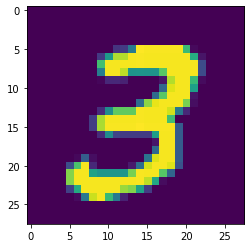

In [8]:
# visualize the data
class_number = 7
plt.imshow(x_train[class_number].reshape(28,28))
classes[y_train[class_number][0]]

In [9]:
y_train[class_number][0]

3

In [10]:
# Normalise the data
x_train, x_test = x_train/255.0, x_test/255.0

In [11]:
# Constructing the network

model = Sequential()

# conv layer 1
model.add(Conv2D(32, (3,3), activation='tanh'))
model.add(MaxPool2D())

# conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

# conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='sigmoid'))

model.add(Dense(32, activation='tanh'))

model.add(Dense(10, activation='softmax'))

In [12]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# fit
model.fit(x_train, y_train, epochs=20,  validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 15s 5ms/step - loss: 0.2880 - accuracy: 0.9184 - val_loss: 0.0983 - val_accuracy: 0.9708
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0884 - accuracy: 0.9737 - val_loss: 0.0789 - val_accuracy: 0.9775
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0630 - accuracy: 0.9815 - val_loss: 0.0822 - val_accuracy: 0.9744
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0537 - val_accuracy: 0.9849
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0634 - val_accuracy: 0.9826
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0607 - val_accuracy

In [14]:
#Testing the pmodel
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [16]:

def pred_out(x_test):
  test_class = model.predict(x_test)
  get_idx=np.zeros(10000).reshape(10000,1)
  for j in range(test_class.shape[0]):
    get_idx[j]=[i for i in range(10) if test_class[j][i]==max(test_class[j])]
  print("The predicted out come by the model is:",get_idx)
  return get_idx

In [20]:
predictions_class=pred_out(x_test)

313/313 [==============================] - 1s 2ms/step
The predicted out come by the model is: [[7.]
 [2.]
 [1.]
 ...
 [4.]
 [5.]
 [6.]]


The predicted value byt the model of the figure is: 9.0


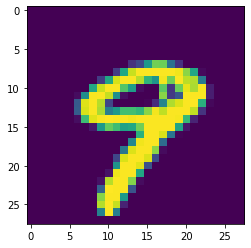

In [25]:
plt.imshow(x_test[9].reshape(28,28))
print(f"The predicted value byt the model of the figure is: {predictions_class[9][0]}")